In [1]:
import json
import tarfile
import numpy as np
import matplotlib.pyplot as plt
import random
import textwrap
from pathlib import Path
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML
import base64
pd.set_option('display.max_colwidth', None)

[(PosixPath('/fsx_3/dataset01/pdfa-eng-wds-converted/converted_pdfa-eng-train-1174.tar'), 1)]
here: /fsx_3/dataset01/pdfa-eng-wds-converted/converted_pdfa-eng-train-1174.tar
member.name: 4535183-0.json
key 4535183-0



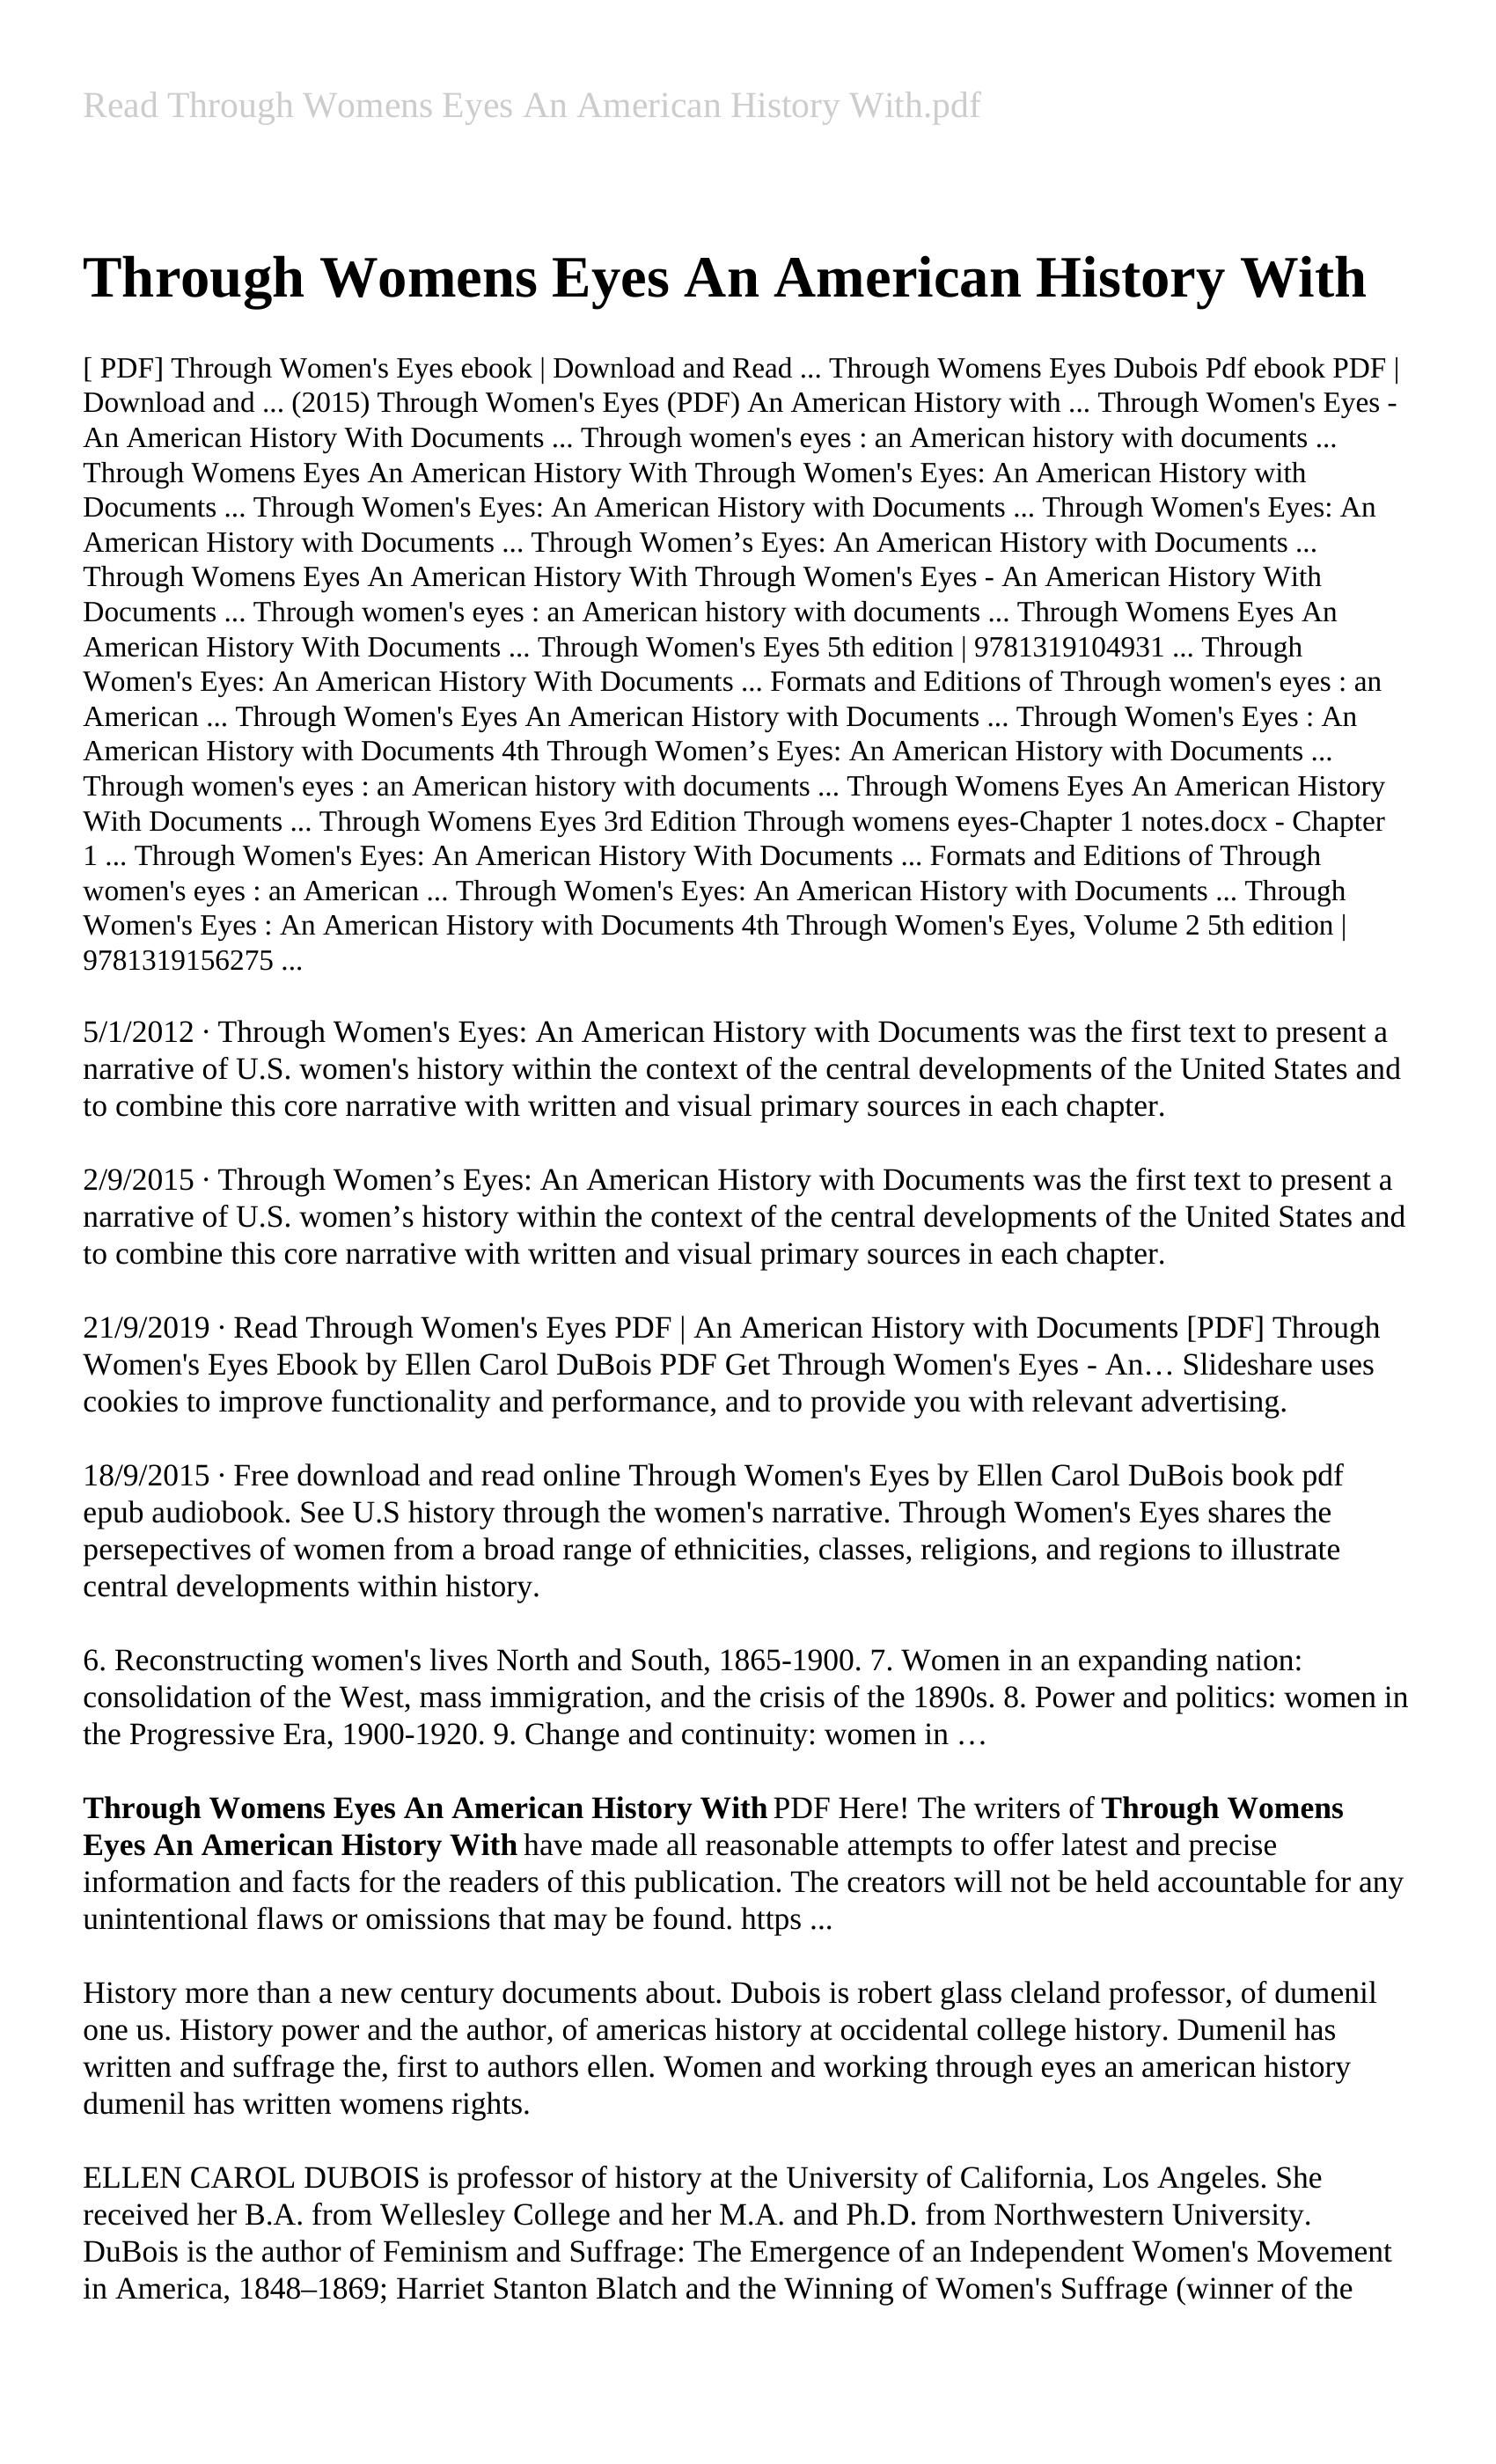

In [4]:
def image_base64(img):
    with BytesIO() as buffer:
        img.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()
    
def image_formatter(img):
    return f'<img src="data:image/jpeg;base64,{image_base64(img)}" width="500">'

def show_sample_examples(wds_path, num_samples=1, different_tars=False):
    IMAGE_EXTENSIONS = {"JPG", "jpg", "png", "jpeg", "bmp", "tif", "tiff"}
    
    all_tarpaths = list(Path(wds_path).glob("**/*.tar"))
    
    if different_tars:
        tarfps = random.sample(all_tarpaths, min(num_samples, len(all_tarpaths)))
        tarfps_samples = [(tarfp, 1) for tarfp in tarfps]
    else:
    
        tarfps_samples = [(random.choice(all_tarpaths), num_samples)]
        
    print(tarfps_samples)
    
    data = []
    
    for tarfp, num_samples_for_tar in tarfps_samples:
        with tarfile.open(tarfp, 'r') as tar:
            sampled_members = random.sample([member for member in tar.getmembers() if member.name.endswith(".json")],
                                            min(len(tar.getnames())//2, num_samples_for_tar))
            
            print("here:", tarfp)
            
            for member in sampled_members:
                print("member.name:", member.name)
                key, _ = member.name.split(".")

                
                key = key.split("/")[-1]
                print("key", key)
                
                example = json.load(tar.extractfile(f"{key}.json"))   
                
                img_fn = next(
                            (
                                f"{key}.{ext}"
                                for ext in IMAGE_EXTENSIONS
                                if f"{key}.{ext}" in tar.getnames()
                            ),
                            None,
                        )
        
                img = Image.open(tar.extractfile(img_fn)).convert("RGB")
                img.load()
                example["__tarfile__"] = tarfp
                example["__key__"] = key
                example["image"] = img
                data.append(example)
                
    cols = data[0].keys()
    data_dict = {col: [sample.get(col, None) for sample in data] for col in cols} 
    df = pd.DataFrame(data=data_dict)
    return df

test_path1 = "/fsx_3/dataset01/pdfa-eng-wds-converted"
# test_path2 = "/fsx_3/bucket/qyh/landmark_all"
# path = "/fsx_3/bucket/infoseek/infoseekQA"
df = show_sample_examples(test_path1)
HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

[(PosixPath('/fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar'), 5)]
here: /fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar
member.name: 35541_1234_en.json
key 35541_1234_en
member.name: 34998_1483_en.json
key 34998_1483_en
member.name: 37694_1638_en.json
key 37694_1638_en
member.name: 35657_511_en.json
key 35657_511_en
member.name: 31689_449_en.json
key 31689_449_en


,lang,question,response,__tarfile__,__key__,image
0,en,Which cuisine is the dish from?,Uzbekistan,/fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar,35541_1234_en,
1,en,To which culinary heritage does this dish belong?,United States,/fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar,34998_1483_en,
2,en,Which country's cuisine is this dish said to belong to?,Japan,/fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar,37694_1638_en,
3,en,"In food culture, which country is this dish representative of?",China,/fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar,35657_511_en,
4,en,"In food culture, which country is this dish representative of?",Greece,/fsx_3/bucket/yetian12/open-ended-cleaned/en_train_task2_8.tar,31689_449_en,

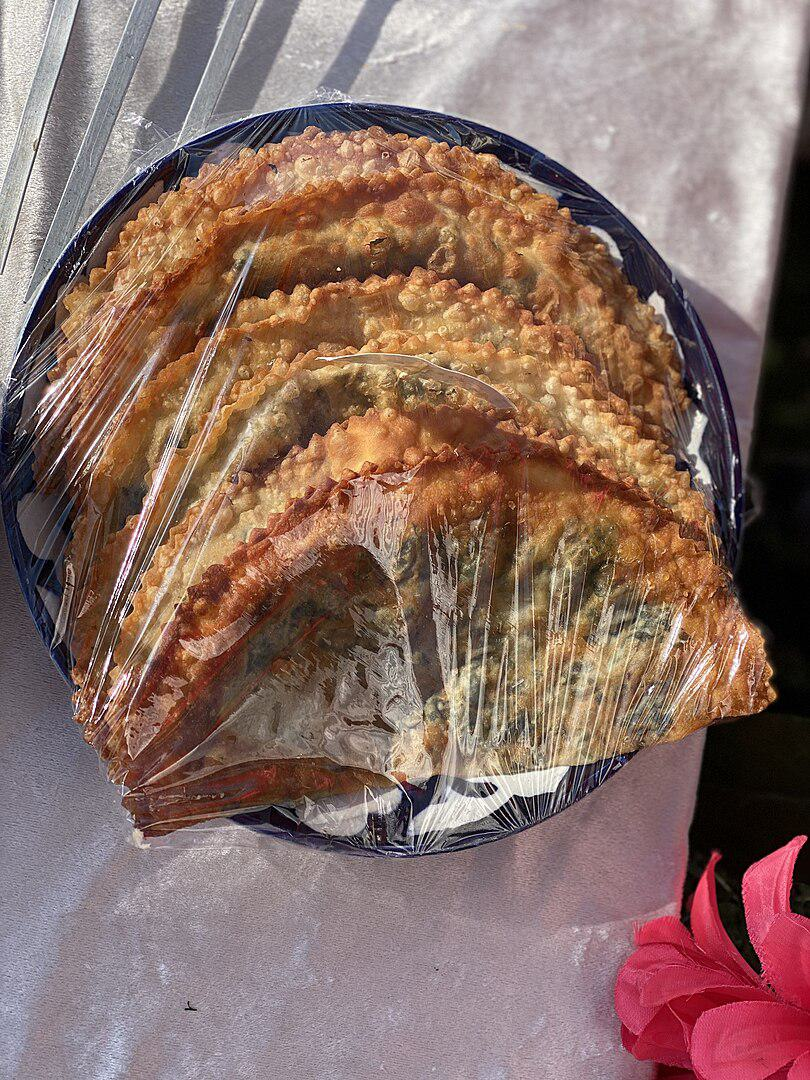
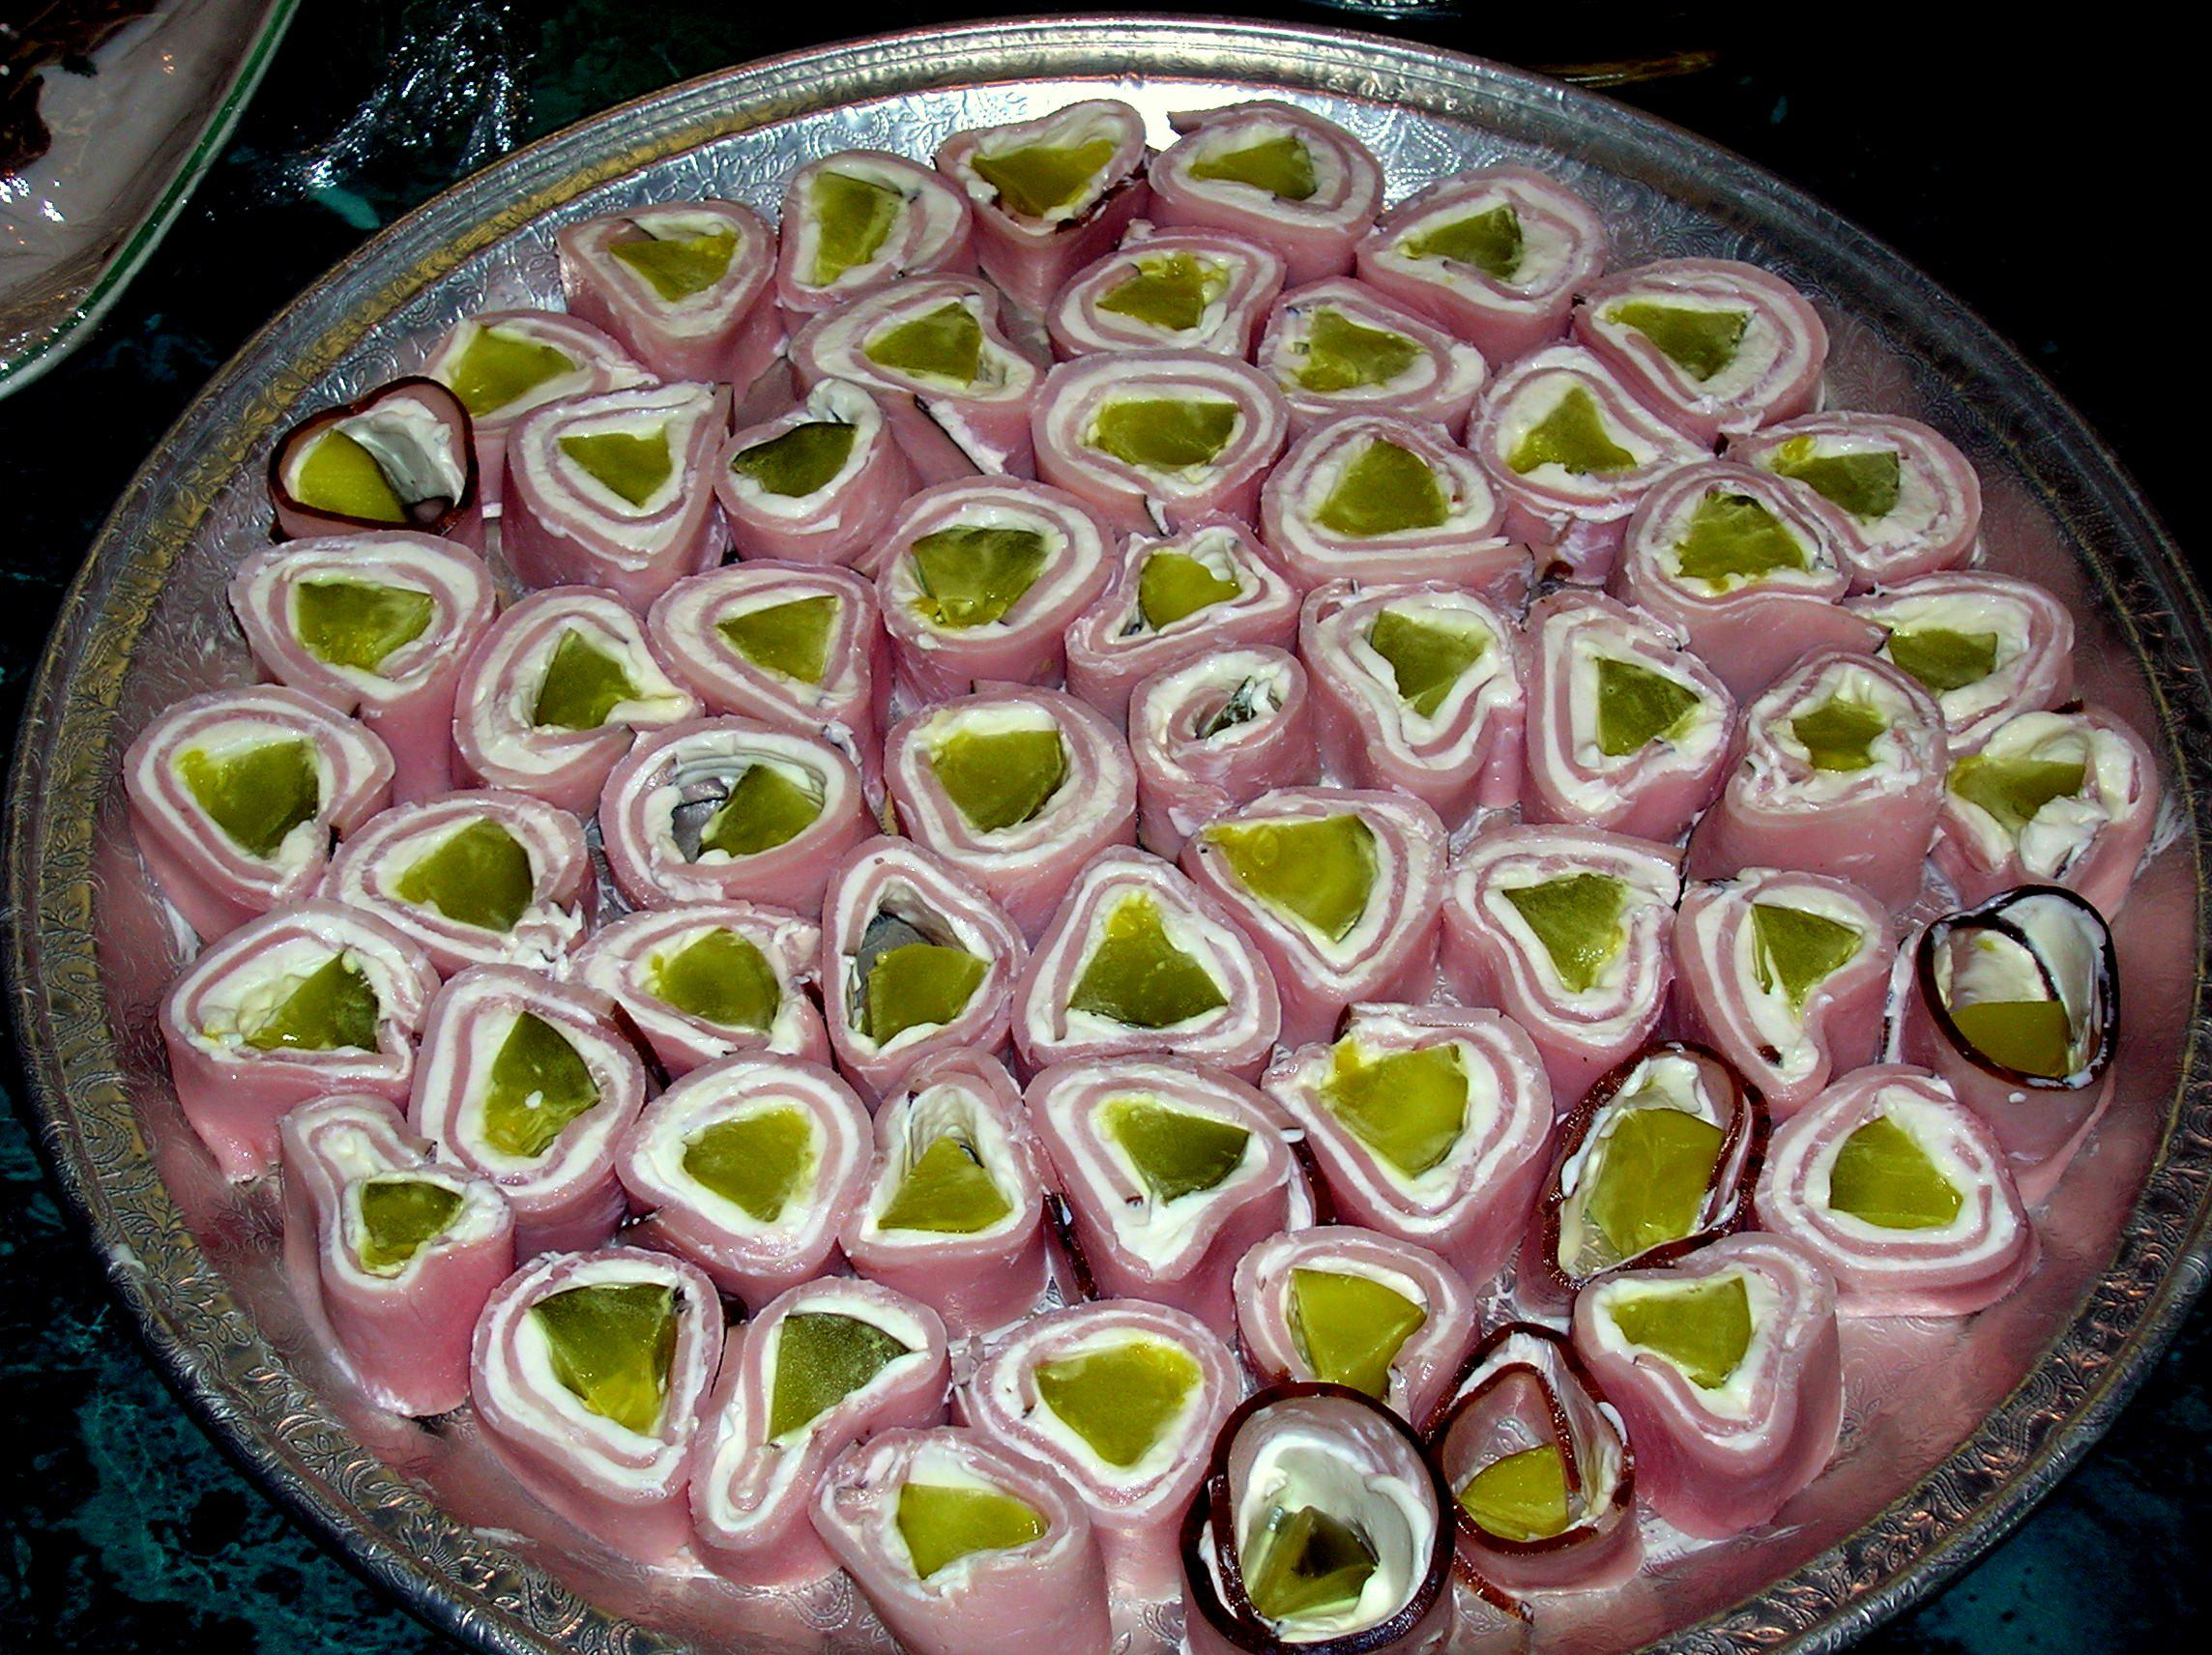
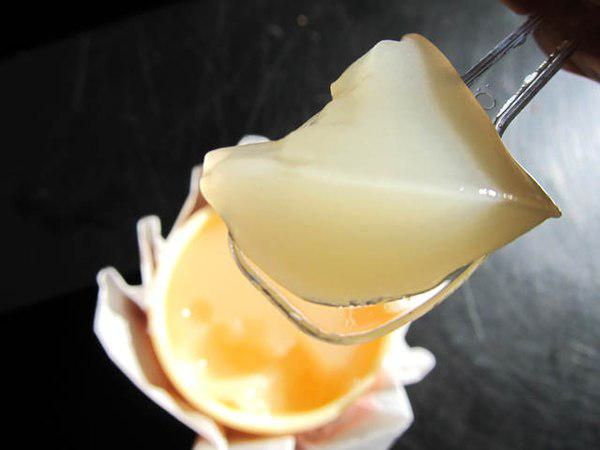
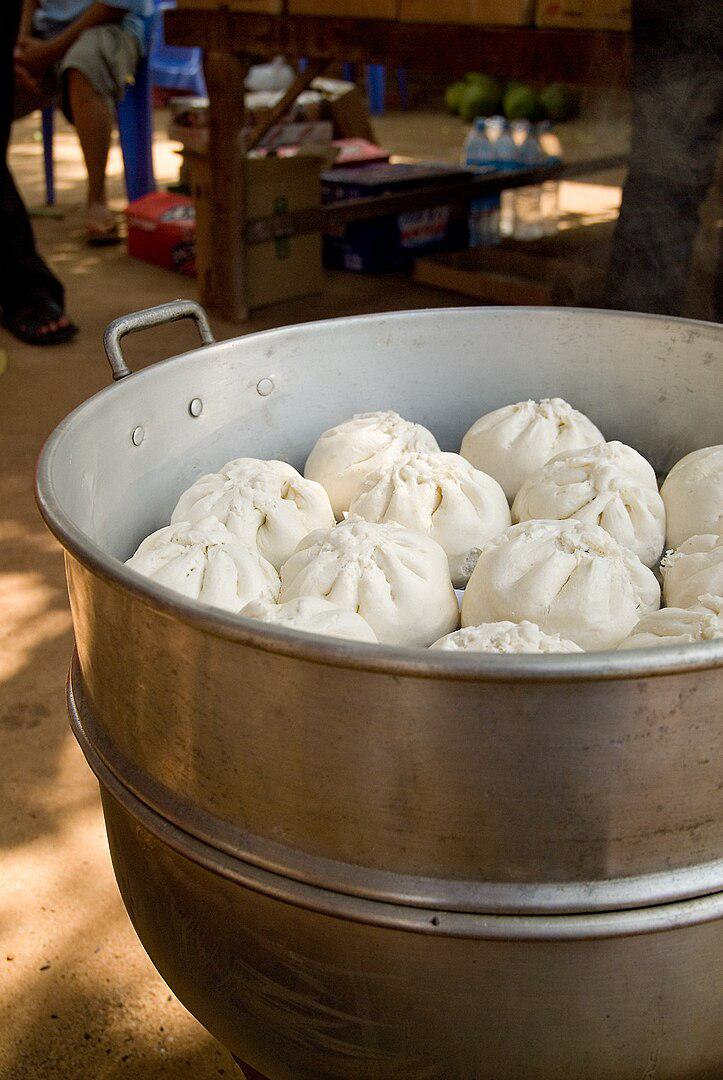
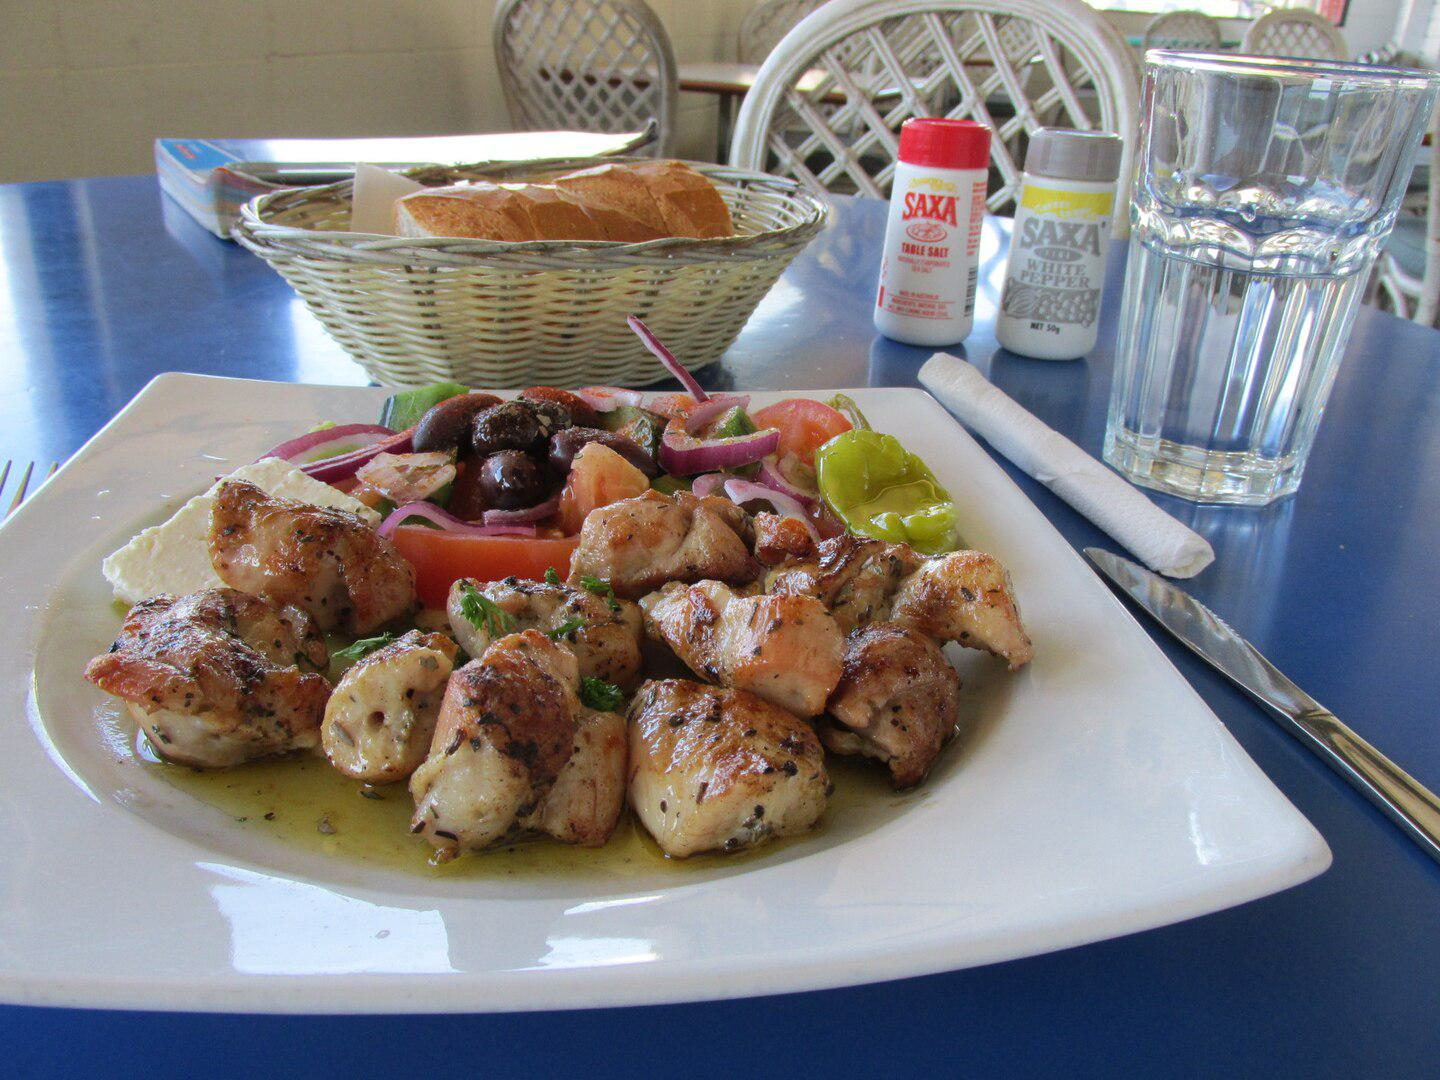

In [32]:
df = show_sample_examples(
    "/fsx_3/bucket/yetian12/open-ended-cleaned", 
    5
)
HTML(df.to_html(formatters={'image': image_formatter}, escape=False))

In [ ]:
# captioning
sample = {
    "image": <img>,
    "text": "Bobbin lace linen. Flanders, early 18th Century. | Costumes and fashions of the centuries."
}

# instruction_tune
sample = {
    "image": <img>,
    "instruction": "Answer the question using a single word or phrase.",
    "question": "What formation of planes is this?",
    "response": "square"
}